# **Web Scraping & Data Handling Challenge**



### **Website:**
JustWatch -  https://www.justwatch.com/in/movies?release_year_from=2000


### **Description:**

JustWatch is a popular platform that allows users to search for movies and TV shows across multiple streaming services like Netflix, Amazon Prime, Hulu, etc. For this assignment, you will be required to scrape movie and TV show data from JustWatch using Selenium, Python, and BeautifulSoup. Extract data from HTML, not by directly calling their APIs. Then, perform data filtering and analysis using Pandas, and finally, save the results to a CSV file.

### **Tasks:**

**1. Web Scraping:**

Use BeautifulSoup to scrape the following data from JustWatch:

   **a. Movie Information:**

      - Movie title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the movie page on JustWatch

   **b. TV Show Information:**

      - TV show title
      - Release year
      - Genre
      - IMDb rating
      - Streaming services available (Netflix, Amazon Prime, Hulu, etc.)
      - URL to the TV show page on JustWatch

  **c. Scope:**

```
 ` - Scrape data for at least 50 movies and 50 TV shows.
   - You can choose the entry point (e.g., starting with popular movies,
     or a specific genre, etc.) to ensure a diverse dataset.`

```


**2. Data Filtering & Analysis:**

   After scraping the data, use Pandas to perform the following tasks:

   **a. Filter movies and TV shows based on specific criteria:**

   ```
      - Only include movies and TV shows released in the last 2 years (from the current date).
      - Only include movies and TV shows with an IMDb rating of 7 or higher.
```

   **b. Data Analysis:**

   ```
      - Calculate the average IMDb rating for the scraped movies and TV shows.
      - Identify the top 5 genres that have the highest number of available movies and TV shows.
      - Determine the streaming service with the most significant number of offerings.
      
   ```   

**3. Data Export:**

```
   - Dump the filtered and analysed data into a CSV file for further processing and reporting.

   - Keep the CSV file in your Drive Folder and Share the Drive link on the colab while keeping view access with anyone.
```

**Submission:**
```
- Submit a link to your Colab made for the assignment.

- The Colab should contain your Python script (.py format only) with clear
  comments explaining the scraping, filtering, and analysis process.

- Your Code shouldn't have any errors and should be executable at a one go.

- Before Conclusion, Keep your Dataset Drive Link in the Notebook.
```



**Note:**

1. Properly handle errors and exceptions during web scraping to ensure a robust script.

2. Make sure your code is well-structured, easy to understand, and follows Python best practices.

3. The assignment will be evaluated based on the correctness of the scraped data, accuracy of data filtering and analysis, and the overall quality of the Python code.








# **Start The Project**

## **Task 1:- Web Scrapping**

In [2]:
#Installing all necessary labraries
!pip install bs4
!pip install requests

In [3]:
#import all necessary labraries
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np

## **Scrapping Movies Data**

In [4]:
import requests
from bs4 import BeautifulSoup

# Specifying the URL from which movies related data will be fetched
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'

# Creating headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.110 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

# Sending an HTTP GET request to the URL with headers
page = requests.get(url, headers=headers)

# Parsing the HTML content using BeautifulSoup with the 'lxml' parser
soup = BeautifulSoup(page.text, 'html.parser')

# Printing the prettified HTML content
# print(soup.prettify())

## **Fetching Movie URL's**

In [5]:
# Initializing the list to store movie URLs
movie_url_list = []

# Finding all links that match the specified class
movie_url = soup.find_all("a", class_="title-list-grid__item--link")

# Iterating over each link and extracting the href attribute
for link in movie_url:
    cnp = "https://www.justwatch.com" + link.get("href")
    url2 = cnp

    # Sending a request to each movie's individual page with headers
    r = requests.get(url2, headers=headers)
    soup2 = BeautifulSoup(r.text, "lxml")

    # Appending the complete URL to the list
    movie_url_list.append(cnp)

# Printing the number of URLs found and the URLs themselves
print(len(movie_url_list))
print(movie_url_list)

100
['https://www.justwatch.com/in/movie/maharaja-2024', 'https://www.justwatch.com/in/movie/kill-2024', 'https://www.justwatch.com/in/movie/project-k', 'https://www.justwatch.com/in/movie/munjha', 'https://www.justwatch.com/in/movie/aadujeevitham', 'https://www.justwatch.com/in/movie/deadpool-3', 'https://www.justwatch.com/in/movie/the-gangster-the-cop-the-devil', 'https://www.justwatch.com/in/movie/kingdom-of-the-planet-of-the-apes', 'https://www.justwatch.com/in/movie/chandu-champion', 'https://www.justwatch.com/in/movie/deadpool', 'https://www.justwatch.com/in/movie/aavesham-2024', 'https://www.justwatch.com/in/movie/agent', 'https://www.justwatch.com/in/movie/dune-part-two', 'https://www.justwatch.com/in/movie/the-fall-guy', 'https://www.justwatch.com/in/movie/harom-hara', 'https://www.justwatch.com/in/movie/bad-boys-4', 'https://www.justwatch.com/in/movie/the-ministry-of-ungentlemanly-warfare', 'https://www.justwatch.com/in/movie/family-star', 'https://www.justwatch.com/in/movie/

In [6]:
def get_movie_data(link, tryCount = 0):
  # so that code doesn't get stuck in infinite loop
  if tryCount > 2:
    return ""

  # fetch data
  response = requests.get(link)

  # handle 429 error
  if response.status_code == 429:
    time.sleep(5)
    return get_movie_data(link, tryCount + 1)

  return BeautifulSoup(response.text, "lxml")

movies_data = []

for link in movie_url_list:
  movie_data = get_movie_data(link)
  movies_data.append(movie_data)

## **Scrapping Movie Title**

In [7]:
# Initialize an empty list to store movie titles
movie_title_list = []

# relevant div elements
movies_data = soup.find_all("div", class_="title-list-grid__item")
for movie_div in movies_data:
    # Extract the value of the data-title attribute
    title = movie_div.get("data-title")
    if title:
        movie_title_list.append(title.strip())

# Print the number of titles and the list of titles
print(len(movie_title_list))
print(movie_title_list)

100
['Maharaja', 'Kill', 'Kalki 2898-AD', 'Munjya', 'The Goat Life', 'Deadpool & Wolverine', 'The Gangster, the Cop, the Devil', 'Kingdom of the Planet of the Apes', 'Chandu Champion', 'Deadpool', 'Aavesham', 'Agent', 'Dune: Part Two', 'The Fall Guy', 'Harom Hara', 'Bad Boys: Ride or Die', 'The Ministry of Ungentlemanly Warfare', 'The Family Star', 'Furiosa: A Mad Max Saga', 'Bhaiyya Ji', 'Stree', '365 Days', 'Indian 2', 'Maharshi', 'Kung Fu Panda 4', 'Je Jatt Vigad Gya', 'Maharaj', 'Mr. & Mrs. Mahi', 'Ullozhukku', 'Weapon', 'Phir Aayi Hasseen Dillruba', 'Laila Majnu', 'Laapataa Ladies', 'Perfect Days', 'Deadpool 2', 'Dune', 'Love Lies Bleeding', 'A Quiet Place: Day One', 'Oppenheimer', 'Manjummel Boys', 'Savi', 'Inside Out', 'Salaar', 'Godzilla x Kong: The New Empire', 'Animal', 'The Zone of Interest', 'Garudan', 'Hit Man', 'Srikanth', 'Longlegs', 'Civil War', '12th Fail', 'The Unbearable Weight of Massive Talent', 'Twisters', 'Premalu', 'Inside Out 2', 'Aranmanai 4', 'Siddharth Roy',

## **Scrapping release Year**

In [8]:
# Step 1: Find all the links that need to be clicked
links = soup.find_all('a', class_='title-list-grid__item--link')
release_year_span = soup.find('span', class_='release-year')
# Step 2: Iterate over each link and send a request to the new page
release_years = []
for link in links:
    href = link['href']
    movie_url = f'https://www.justwatch.com{href}'  # Construct the full URL
    movie_response = requests.get(movie_url,headers=headers)
    movie_soup = BeautifulSoup(movie_response.content, 'lxml')

# Step 3: Extract the release year
    release_year_span = movie_soup.find('span', class_='release-year')
    if not release_year_span:
        title_block = movie_soup.find('div', class_='title-block')
        if title_block:
            release_year_span = title_block.find('span', class_='release-year')

    if release_year_span:
        release_year = release_year_span.text.strip().strip('()')
        release_years.append(release_year)

# Output the release years
print(len(release_years))
print(release_years)


36
['2024', '2024', '2024', '2024', '2024', '2024', '2019', '2024', '2024', '2016', '2024', '2023', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2024', '2018', '2024', '2023', '2021', '2023', '2024', '2023', '2024', '2023', '2024', '2024', '2024', '2022', '2024', '2019']


## **Scrapping Genres**

In [9]:
# Step 2: Find all the links that need to be clicked
links = soup.find_all('a', class_='title-list-grid__item--link')
release_year_span = soup.find('span', class_='release-year')
# Step 3: Iterate over each link and send a request to the new page
genres = []
for link in links:
    href = link['href']
    movie_url = f'https://www.justwatch.com{href}'  # Construct the full URL
    movie_response = requests.get(movie_url,headers=headers)
    movie_soup = BeautifulSoup(movie_response.content, 'lxml')

    h3_element = movie_soup.find('h3', class_='detail-infos__subheading', string='Genres')

    if h3_element:
            # Find the next sibling <div> with the class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')


        if div_element:
            span_element = div_element.find('span')
            genres.append(span_element.text.strip())


print(len(genres))
print(genres)


30
['Crime, Drama, Mystery & Thriller, Action & Adventure', 'Action & Adventure, Crime, Drama, Mystery & Thriller', 'Drama, Fantasy, Science-Fiction, Mystery & Thriller, Action & Adventure', 'Action & Adventure, Comedy, Science-Fiction', 'Action & Adventure, Mystery & Thriller, Crime', 'Drama, History, Sport, War & Military, Action & Adventure', 'Comedy, Action & Adventure', 'Mystery & Thriller, Action & Adventure', 'Science-Fiction, Action & Adventure, Drama', 'Action & Adventure, Crime, Drama', 'Crime, Mystery & Thriller, Comedy, Action & Adventure', 'War & Military, Action & Adventure, Comedy', 'Drama, Action & Adventure', 'Drama, Romance, Made in Europe', 'Drama', 'Drama, History, Mystery & Thriller, Crime', 'Mystery & Thriller, Romance, Crime, Drama', 'Drama, Romance', 'Comedy, Drama', 'Comedy, Action & Adventure, Science-Fiction', 'Drama, Horror, Science-Fiction, Mystery & Thriller', 'Drama, Comedy, Kids & Family, Fantasy, Animation', 'Crime, Drama, Mystery & Thriller, Action & A

## **Scrapping IMBD Rating**

In [10]:
import requests
from bs4 import BeautifulSoup

# Specifying the URL from which movies related data will be fetched
url = 'https://www.justwatch.com/in/movies?release_year_from=2000'

# Creating headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.110 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

# Sending an HTTP GET request to the URL with headers
page = requests.get(url, headers=headers)

# Parsing the HTML content using BeautifulSoup with the 'lxml' parser
soup = BeautifulSoup(page.text, 'html.parser')

# Step 2: Find all the links that need to be clicked
links = soup.find_all('a', class_='title-list-grid__item--link')
release_year_span = soup.find('span', class_='release-year')
# Step 3: Iterate over each link and send a request to the new page
imdb_ratings = []
for link in links:
    href = link['href']
    movie_url = f'https://www.justwatch.com{href}'  # Construct the full URL
    movie_response = requests.get(movie_url,headers=headers)
    movie_soup = BeautifulSoup(movie_response.content, 'lxml')

    # Step 4: Extract the genre
    detail_info_divs = movie_soup.find_all('div', class_='jw-scoring-listing__rating--link')
    # print(detail_info_divs)
    for div in detail_info_divs:
        div = div.find('div')  # Look for a span element inside the div
        if div:
            span_content = div.text.split(' ')
            span_content=span_content[0]
            # print(span_content)
            imdb_ratings.append(span_content)


print(len(imdb_ratings))
print(imdb_ratings)



58
['8.6', '8.6', '7.7', '7.7', '7.6', '7.6', '7.2', '7.2', '8.1', '8.1', '6.9', '6.9', '8.1', '8.1', '4.2', '4.2', '6.9', '6.9', '8.0', '8.0', '6.7', '6.7', '6.8', '6.8', '5.2', '5.2', '7.5', '7.5', '3.3', '3.3', '5.1', '5.1', '6.3', '6.3', '6.5', '6.5', '5.9', '5.9', '8.4', '8.4', '7.6', '7.6', '6.5', '6.5', '6.2', '6.2', '7.1', '7.1', '7.8', '7.8', '5.2', '5.2', '7.7', '7.7', '7.7', '7.7', '7.1', '7.1']


## **Scrapping Runtime/Duration**

In [11]:
# Step 2: Find all the links that need to be clicked
links = soup.find_all('a', class_='title-list-grid__item--link')
release_year_span = soup.find('span', class_='release-year')
# Step 3: Iterate over each link and send a request to the new page
durations = []
for link in links:
    href = link['href']
    movie_url = f'https://www.justwatch.com{href}'  # Construct the full URL
    movie_response = requests.get(movie_url,headers=headers)
    movie_soup = BeautifulSoup(movie_response.content, 'lxml')
    h3_element = movie_soup.find('h3', class_='detail-infos__subheading', string='Runtime')

    if h3_element:
            # Find the next sibling <div> with the class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            # Extract and return the text content from the <div>
            durations.append(div_element.text.strip())


print(len(durations))
print(durations)


33
['2h 30min', '1h 45min', '3h 1min', '2h 3min', '2h 0min', '2h 8min', '2h 22min', '2h 38min', '2h 34min', '2h 47min', '2h 6min', '2h 34min', '1h 55min', '2h 30min', '2h 8min', '3h 0min', '2h 12min', '2h 12min', '2h 13min', '2h 2min', '2h 4min', '1h 44min', '2h 3min', '2h 13min', '2h 26min', '2h 28min', '2h 34min', '1h 53min', '2h 50min', '2h 27min', '2h 52min', '2h 36min', '2h 56min']


## **Scrapping Age Rating**

In [12]:
# Step 2: Find all the links that need to be clicked
links = soup.find_all('a', class_='title-list-grid__item--link')
release_year_span = soup.find('span', class_='release-year')
# Step 3: Iterate over each link and send a request to the new page
ageratings = []
for link in links:
    href = link['href']
    movie_url = f'https://www.justwatch.com{href}'  # Construct the full URL
    movie_response = requests.get(movie_url,headers=headers)
    movie_soup = BeautifulSoup(movie_response.content, 'lxml')

    # Step 4: Extract the genre
    h3_element = movie_soup.find('h3', class_='detail-infos__subheading', string='Age rating')

    if h3_element:
            # Find the next sibling <div> with the class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            # Extract and return the text content from the <div>
            ageratings.append(div_element.text.strip())


print(len(ageratings))
print(ageratings)


23
['A', 'UA', 'UA', 'A', 'UA', 'A', 'UA', 'UA', 'A', 'A', 'UA', 'UA', 'A', 'UA', 'UA', 'A', 'U', 'U', 'UA', 'UA', 'U', 'UA', 'UA']


## **Fetching Production Countries Details**

In [13]:
# Step 2: Find all the links that need to be clicked
links = soup.find_all('a', class_='title-list-grid__item--link')
release_year_span = soup.find('span', class_='release-year')
# Step 3: Iterate over each link and send a request to the new page
production_countries = []
for link in links:
    href = link['href']
    movie_url = f'https://www.justwatch.com{href}'  # Construct the full URL
    movie_response = requests.get(movie_url,headers=headers)
    movie_soup = BeautifulSoup(movie_response.content, 'lxml')

    # Step 4: Extract the genre
    h3_element = movie_soup.find('h3', class_='detail-infos__subheading', string=' Production country ')

    if h3_element:
            # Find the next sibling <div> with the class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            # Extract and return the text content from the <div>
            production_countries.append(div_element.text.strip())


print(len(production_countries))
print(production_countries)


32
['India', 'India', 'United States', 'South Korea', 'India', 'India', 'India', 'United States', 'United States, United Kingdom, Turkey', 'Poland', 'India', 'India', 'India', 'India', 'Japan, Germany', 'United States', 'United States', 'India', 'United States', 'India', 'United States', 'India', 'United States', 'United States', 'India', 'India', 'Sweden, India', 'United States', 'India', 'India', 'United States, India', 'India']


## **Fetching Streaming Service Details**

In [92]:
# Step 2: Find all the links that need to be clicked
links = soup.find_all('a', class_='title-list-grid__item--link')
release_year_span = soup.find('span', class_='release-year')
# Step 3: Iterate over each link and send a request to the new page
movie_services = []
for link in links:
    href = link['href']
    movie_url = f'https://www.justwatch.com{href}'  # Construct the full URL
    movie_response = requests.get(movie_url,headers=headers)
    movie_soup = BeautifulSoup(movie_response.content, 'lxml')

    # Step 4: Extract the genre
    target_text = 'where to watch online'
    h2_element = movie_soup.find('h2', class_='heading', string=lambda text: text and target_text in text)
    # print(h2_element)

    if h2_element:
          # Find the next sibling <div> with the class "detail-infos__value"
        p_element = h2_element.find_next_sibling('p')
        if p_element:
          # Extract and return the text content from the <div>
          p_text=p_element.text.strip()
          # movie_services.append(p_text)
          start_text = 'streaming on '
          start_index = p_text.find(start_text)
          if start_index != -1:
        # Extract text after 'streaming on '
              result_text = p_text[start_index + len(start_text):].strip('. ')
              # print(result_text)\
              movie_services.append(result_text)

    #     if div_element:
    #         # Extract and return the text content from the <div>
    #         movie_services.append(div_element.text.strip())


print(len(movie_services))
print(movie_services)


54
['Netflix', 'Netflix', 'Hotstar. It is also possible to buy "Kingdom of the Planet of the Apes" on Apple TV, Google Play Movies, YouTube as download or rent it on Amazon Video online', 'Amazon Prime Video', 'Hotstar. It is also possible to buy "Deadpool" on Google Play Movies, YouTube, Apple TV as download or rent it on Amazon Video, Apple TV, Google Play Movies, YouTube online', 'Amazon Prime Video, Hotstar or rent it on Amazon Video online', 'Jio Cinema. It is also possible to buy "Dune: Part Two" on Apple TV, Google Play Movies, YouTube as download or rent it on Amazon Video, Apple TV, Google Play Movies, YouTube online', 'Amazon Prime Video, Jio Cinema, aha', 'Amazon Prime Video', 'Amazon Prime Video, Jio Cinema or rent it on Amazon Video online', 'Zee5', 'Hotstar. It is also possible to buy "Stree" on Apple TV, Google Play Movies, YouTube as download or rent it on Google Play Movies, YouTube, Apple TV online', 'Netflix', 'Netflix', 'Amazon Prime Video or for free with ads on Ho

## **Now Creating Movies DataFrame**

In [17]:
lists = {
    'movie_url_list': movie_url_list,
    'movie_title_list': movie_title_list,
    'release_years': release_years,
    'genres': genres,
    'imdb_ratings': imdb_ratings,
    'durations': durations,
    'ageratings': ageratings,
    'production_countries': production_countries,
    'Streaming_Service_lists': Streaming_Service_lists
}

# Print lengths of all lists
for name, lst in lists.items():
    print(f"{name}: {len(lst)}")
# Finding the minimum length among the lists
min_length = min(len(lst) for lst in lists.values())

# Truncate all lists to this minimum length
for name, lst in lists.items():
    lists[name] = lst[:min_length]

# Creating the DataFrame after truncation
df = pd.DataFrame(lists)

df['imdb_ratings'] = pd.to_numeric(df['imdb_ratings'], errors='coerce')


# Finding the top five values based on IMDB Rating
top_five = df.nlargest(5, 'imdb_ratings')

print("\nTop Five Movies by IMDB Rating:")
print(top_five)

movie_url_list: 100
movie_title_list: 100
release_years: 36
genres: 30
imdb_ratings: 58
durations: 33
ageratings: 23
production_countries: 32
Streaming_Service_lists: 100

Top Five Movies by IMDB Rating:
                                       movie_url_list movie_title_list  \
0    https://www.justwatch.com/in/movie/maharaja-2024         Maharaja   
1        https://www.justwatch.com/in/movie/kill-2024             Kill   
8   https://www.justwatch.com/in/movie/chandu-cham...  Chandu Champion   
9         https://www.justwatch.com/in/movie/deadpool         Deadpool   
12   https://www.justwatch.com/in/movie/dune-part-two   Dune: Part Two   

   release_years                                             genres  \
0           2024  Crime, Drama, Mystery & Thriller, Action & Adv...   
1           2024  Action & Adventure, Crime, Drama, Mystery & Th...   
8           2024         Science-Fiction, Action & Adventure, Drama   
9           2016                   Action & Adventure, Crime, Drama

## **Scraping TV  Show Data**

In [18]:
import requests
from bs4 import BeautifulSoup

# Specifying the URL from which TV show related data will be fetched
tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Creating headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.110 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

# Sending an HTTP GET request to the URL with headers
page = requests.get(tv_url, headers=headers)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_tv = BeautifulSoup(page.text, 'html.parser')

# Printing the prettified HTML content (commented out to avoid large output)
print(soup_tv.prettify())

<!DOCTYPE html>
<html data-vue-meta="%7B%22dir%22:%7B%22ssr%22:%22ltr%22%7D,%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-vue-meta-server-rendered="" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="IE=edge" data-vue-meta="ssr" httpequiv="X-UA-Compatible"/>
  <meta content="viewport-fit=cover, width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" data-vue-meta="ssr" name="viewport"/>
  <meta content="JustWatch" data-vue-meta="ssr" property="og:site_name"/>
  <meta content="794243977319785" data-vue-meta="ssr" property="fb:app_id"/>
  <meta content="/appassets/img/JustWatch_logo_with_claim.png" data-vmid="og:image" data-vue-meta="ssr" property="og:image"/>
  <meta content="606" data-vmid="og:image:width" data-vue-meta="ssr" property="og:image:width"/>
  <meta content="302" data-vmid="og:image:height" data-vue-meta="ssr" pro

## **Fetching Tv shows Url details**

In [19]:
import requests
from bs4 import BeautifulSoup

# Specifying the URL from which TV show related data will be fetched
tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Creating headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.110 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

# Sending an HTTP GET request to the URL with headers
page = requests.get(tv_url, headers=headers)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_tv = BeautifulSoup(page.text, 'html.parser')

# Printing the prettified HTML content (commented out to avoid large output)
# print(soup_tv.prettify())

# Initializing the list to store movie URLs
tvshow_url_list = []

# Finding all links that match the specified class
tvshow_url = soup_tv.find_all("a", class_="title-list-grid__item--link")

# Iterating over each link and extracting the href attribute
for link in tvshow_url:
    cnp = "https://www.justwatch.com" + link.get("href")
    url2 = cnp

    # Sending a request to each movie's individual page with headers
    r = requests.get(url2, headers=headers)
    soup2 = BeautifulSoup(r.text, "lxml")

    # Appending the complete URL to the list
    tvshow_url_list.append(cnp)

# Printing the number of URLs found and the URLs themselves
print(len(tvshow_url_list))
print(tvshow_url_list)

100
['https://www.justwatch.com/in/tv-show/mirzapur', 'https://www.justwatch.com/in/tv-show/house-of-the-dragon', 'https://www.justwatch.com/in/tv-show/the-boys', 'https://www.justwatch.com/in/tv-show/sweet-home', 'https://www.justwatch.com/in/tv-show/panchayat', 'https://www.justwatch.com/in/tv-show/game-of-thrones', 'https://www.justwatch.com/in/tv-show/apharan', 'https://www.justwatch.com/in/tv-show/adams-sweet-agony', 'https://www.justwatch.com/in/tv-show/shogun-2024', 'https://www.justwatch.com/in/tv-show/tribhuvan-mishra-ca-topper', 'https://www.justwatch.com/in/tv-show/demon-slayer-kimetsu-no-yaiba', 'https://www.justwatch.com/in/tv-show/presumed-innocent', 'https://www.justwatch.com/in/tv-show/batman-caped-crusader', 'https://www.justwatch.com/in/tv-show/the-bear', 'https://www.justwatch.com/in/tv-show/x-x-x-uncensored', 'https://www.justwatch.com/in/tv-show/y-the-last-man', 'https://www.justwatch.com/in/tv-show/elite', 'https://www.justwatch.com/in/tv-show/bigg-boss-ott', 'htt

## **Fetching Tv Show Title details**

In [21]:
import requests
from bs4 import BeautifulSoup

# Specifying the URL from which TV show related data will be fetched
tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Creating headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.110 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

# Sending an HTTP GET request to the URL with headers
page = requests.get(tv_url, headers=headers)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_tv = BeautifulSoup(page.text, 'html.parser')

# Printing the prettified HTML content (commented out to avoid large output)
# print(soup_tv.prettify())

# Initialize an empty list to store movie titles
tvshow_title_list = []

# relevant div elements
tvshow_data = soup_tv.find_all("div", class_="title-list-grid__item")
for movie_div in tvshow_data:
    # Extract the value of the data-title attribute
    title = movie_div.get("data-title")
    if title:
        tvshow_title_list.append(title.strip())

# Print the number of titles and the list of titles
print(len(tvshow_title_list))
print(tvshow_title_list)

100
['Mirzapur', 'House of the Dragon', 'The Boys', 'Sweet Home', 'Panchayat', 'Game of Thrones', 'Apharan', "Adam's Sweet Agony", 'Shōgun', 'Tribhuvan Mishra CA Topper', 'Demon Slayer: Kimetsu no Yaiba', 'Presumed Innocent', 'Batman: Caped Crusader', 'The Bear', 'XXX: Uncensored', 'Y: The Last Man', 'Elite', 'Bigg Boss OTT', 'Mastram', 'Money Heist', 'Gullak', 'Attack on Titan', 'Gyaarah Gyaarah', 'Mad Men', 'Bigg Boss', 'Shahmaran', 'Aashram', 'Asur: Welcome to Your Dark Side', 'Kota Factory', 'Breaking Bad', 'Evil', 'Cobra Kai', 'Those About to Die', 'Farzi', 'Stranger Things', 'College Romance', 'Unsolved Mysteries', 'The Rookie', 'Raising Voices', 'The Family Man', 'The Umbrella Academy', "A Good Girl's Guide to Murder", 'Dark', 'Fallout', 'Westworld', 'You', 'Scam 1992: The Harshad Mehta Story', 'The Flash', 'Gandii Baat', 'MTV Splitsvilla', 'True Detective', 'Mayor of Kingstown', 'Naruto', '3 Body Problem', 'Jamnapaar', 'Master of the House', 'Peaky Blinders', 'Jujutsu Kaisen', 

## **Fetching Release Year**

In [22]:
import requests
from bs4 import BeautifulSoup

# Specifying the URL from which TV show related data will be fetched
tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Creating headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.110 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

# Sending an HTTP GET request to the URL with headers
page = requests.get(tv_url, headers=headers)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_tv = BeautifulSoup(page.text, 'html.parser')

# Printing the prettified HTML content (commented out to avoid large output)
# print(soup_tv.prettify())

# Initialize an empty list to store movie titles
tvshow_release_years_list = []

links = soup_tv.find_all('a', class_='title-list-grid__item--link')
release_year_span = soup_tv.find('span', class_='release-year')
# Step 3: Iterate over each link and send a request to the new page
tvshow_title_list = []
for link in links:
    href = link['href']
    movie_url = f'https://www.justwatch.com{href}'  # Construct the full URL
    movie_response = requests.get(movie_url,headers=headers)
    movie_soup = BeautifulSoup(movie_response.content, 'lxml')

    # Step 4: Extract the release year
    release_year_span = movie_soup.find('span', class_='release-year')

    if release_year_span:
        release_year = release_year_span.text
        release_year=release_year.replace("(", "").replace(")", "")
        tvshow_release_years_list.append(release_year)

# Output the release years
print(len(tvshow_release_years_list))
print(tvshow_release_years_list)

30
['2018', '2022', '2019', '2020', '2024', '2024', '2024', '2019', '2022', '2020', '2017', '2024', '2006', '2020', '2008', '2019', '2018', '2023', '2024', '2019', '2019', '2018', '2008', '2002', '2024', '2005', '2019', '2024', '2009', '2023']


## **Fetching TV Show Genre Details**

In [23]:
import requests
from bs4 import BeautifulSoup

# Specifying the URL from which TV show related data will be fetched
tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Creating headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.110 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

# Sending an HTTP GET request to the URL with headers
page = requests.get(tv_url, headers=headers)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_tv = BeautifulSoup(page.text, 'html.parser')

# Printing the prettified HTML content (commented out to avoid large output)
# print(soup_tv.prettify())

# Initialize an empty list to store movie titles
tvshow_release_years_list = []

links = soup_tv.find_all('a', class_='title-list-grid__item--link')
release_year_span = soup_tv.find('span', class_='release-year')
# Step 3: Iterate over each link and send a request to the new page
tvshow_genres = []
for link in links:
    href = link['href']
    movie_url = f'https://www.justwatch.com{href}'  # Construct the full URL
    movie_response = requests.get(movie_url,headers=headers)
    movie_soup = BeautifulSoup(movie_response.content, 'lxml')

    # Step 4: Extract the release year
    h3_element = movie_soup.find('h3', class_='detail-infos__subheading', string='Genres')

    if h3_element:
            # Find the next sibling <div> with the class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')


        if div_element:
            span_element = div_element.find('span')
            tvshow_genres.append(span_element.text.strip())


print(len(tvshow_genres))
print(tvshow_genres)


23
['Action & Adventure, Drama, Mystery & Thriller, Crime', 'Animation', 'War & Military, Drama, History', 'Mystery & Thriller, Comedy, Crime, Drama', 'Action & Adventure, Science-Fiction, Animation, Fantasy, Mystery & Thriller', 'Mystery & Thriller, Action & Adventure, Crime, Drama, Made in Europe', 'Horror, Animation, Action & Adventure, Drama, Fantasy, Science-Fiction', 'Drama, Fantasy, Science-Fiction', 'Drama, Crime, Mystery & Thriller', 'Drama, Horror, Mystery & Thriller, Crime', 'Drama, Sport, Action & Adventure, Comedy', 'Drama', 'Action & Adventure, Drama, Science-Fiction, War & Military, Mystery & Thriller', 'Science-Fiction, Drama, Western', 'Drama, Romance, Mystery & Thriller, Crime', 'Crime, Drama, Mystery & Thriller', 'Mystery & Thriller', 'Comedy, Drama, Romance', 'Animation, Action & Adventure, Science-Fiction, Comedy, Drama, Fantasy', 'Drama, History, Romance, War & Military', 'Drama, Romance, Comedy', 'Drama', 'Drama']


## **Fetching IMDB Rating Details**

In [71]:
import requests
from bs4 import BeautifulSoup

# Specifying the URL from which TV show related data will be fetched
tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Creating headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.110 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

# Sending an HTTP GET request to the URL with headers
page = requests.get(tv_url, headers=headers)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_tv = BeautifulSoup(page.text, 'html.parser')

# Printing the prettified HTML content (commented out to avoid large output)
# print(soup_tv.prettify())

# Initialize an empty list to store movie titles
tvshow_release_years_list = []

links = soup_tv.find_all('a', class_='title-list-grid__item--link')
release_year_span = soup_tv.find('span', class_='release-year')
# Step 3: Iterate over each link and send a request to the new page
tvshow_imdb_ratings = []
for link in links:
    href = link['href']
    movie_url = f'https://www.justwatch.com{href}'  # Construct the full URL
    movie_response = requests.get(movie_url,headers=headers)
    movie_soup = BeautifulSoup(movie_response.content, 'lxml')

    # Step 4: Extract the release year
    detail_info_divs = movie_soup.find_all('div', class_='jw-scoring-listing__rating--link')
    # print(detail_info_divs)
    for div in detail_info_divs:
        div = div.find('div')  # Look for a span element inside the div
        if div:
            span_content = div.text.split(' ')
            span_content=span_content[0]
            # print(span_content)
            tvshow_imdb_ratings.append(span_content)


print(len(tvshow_imdb_ratings))
print(tvshow_imdb_ratings)

134
['8.5', '8.5', '8.4', '8.4', '8.7', '8.7', '7.3', '7.3', '9.0', '9.0', '9.2', '9.2', '8.2', '8.2', '8.7', '8.7', '7.0', '7.0', '8.6', '8.6', '7.7', '7.7', '7.4', '7.4', '8.6', '8.6', '4.8', '4.8', '6.0', '6.0', '7.2', '7.2', '1.9', '1.9', '6.9', '6.9', '8.2', '8.2', '9.1', '9.1', '9.1', '9.1', '8.4', '8.4', '8.7', '8.7', '3.6', '3.6', '5.3', '5.3', '6.6', '6.6', '8.5', '8.5', '9.0', '9.0', '9.5', '9.5', '7.8', '7.8', '8.5', '8.5', '6.6', '6.6', '8.4', '8.4', '8.7', '8.7', '8.3', '8.3', '7.3', '7.3', '8.0', '8.0', '7.2', '7.2', '8.7', '8.7', '7.9', '7.9', '6.8', '6.8', '8.7', '8.7', '8.4', '8.4', '8.5', '8.5', '7.7', '7.7', '9.2', '9.2', '7.5', '7.5', '3.4', '3.4', '3.8', '3.8', '8.9', '8.9', '8.2', '8.2', '8.4', '8.4', '7.5', '7.5', '8.2', '8.2', '6.2', '6.2', '8.8', '8.8', '8.6', '8.6', '7.7', '7.7', '8.3', '8.3', '8.1', '8.1', '7.4', '7.4', '8.9', '8.9', '6.5', '6.5', '9.1', '9.1', '7.5', '7.5', '6.4', '6.4', '7.7', '7.7']


## **Fetching Age Rating Details**

In [24]:
import requests
from bs4 import BeautifulSoup

# Specifying the URL from which TV show related data will be fetched
tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Creating headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.110 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

# Sending an HTTP GET request to the URL with headers
page = requests.get(tv_url, headers=headers)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_tv = BeautifulSoup(page.text, 'html.parser')

# Initialize an empty list to store movie titles
ageratings_list = []

links = soup_tv.find_all('a', class_='title-list-grid__item--link')
release_year_span = soup_tv.find('span', class_='release-year')
# Step 3: Iterate over each link and send a request to the new page
for link in links:
    href = link['href']
    movie_url = f'https://www.justwatch.com{href}'  # Construct the full URL
    movie_response = requests.get(movie_url,headers=headers)
    movie_soup = BeautifulSoup(movie_response.content, 'lxml')

    h3_element = movie_soup.find('h3', class_='detail-infos__subheading', string='Age rating')

    if h3_element:
            # Find the next sibling <div> with the class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            # Extract and return the text content from the <div>
            ageratings_list.append(div_element.text.strip())


print(len(ageratings_list))
print(ageratings_list)


14
['A', 'A', 'A', 'A', 'U', 'A', 'A', 'UA', 'A', 'A', 'A', 'A', 'U', 'A']


## **Fetching Production Country details**

In [25]:
import requests
from bs4 import BeautifulSoup

# Specifying the URL from which TV show related data will be fetched
tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Creating headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.110 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

# Sending an HTTP GET request to the URL with headers
page = requests.get(tv_url, headers=headers)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_tv = BeautifulSoup(page.text, 'html.parser')

# Initialize an empty list to store movie titles
tvshow_prod_countries=[]

links = soup_tv.find_all('a', class_='title-list-grid__item--link')
release_year_span = soup_tv.find('span', class_='release-year')
# Step 3: Iterate over each link and send a request to the new page
for link in links:
    href = link['href']
    movie_url = f'https://www.justwatch.com{href}'  # Construct the full URL
    movie_response = requests.get(movie_url,headers=headers)
    movie_soup = BeautifulSoup(movie_response.content, 'lxml')

    h3_element = movie_soup.find('h3', class_='detail-infos__subheading', string=' Production country ')

    if h3_element:
            # Find the next sibling <div> with the class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            # Extract and return the text content from the <div>
            tvshow_prod_countries.append(div_element.text.strip())


print(len(tvshow_prod_countries))
print(tvshow_prod_countries)


28
['India', 'United States', 'United States', 'South Korea', 'India', 'United States', 'Japan', 'United States', 'India', 'Spain', 'India', 'Japan', 'India', 'United States', 'United States', 'United States', 'Spain', 'India', 'United Kingdom', 'India', 'India', 'United States', 'United States', 'South Korea', 'India', 'India', 'China', 'India']


## **Fetching Streaming Service details**

In [27]:

# Write Your Code here
show_stream = []
for TVShow_data in tvshow_title_list:
  try:
    img_stream = TVShow_data.find("div", class_ = "buybox-row stream" ).find_all("img", class_= "offer__icon")
    show_alt = [stream["alt"] for stream in  img_stream]
    stream_val = ",".join(show_alt)
  except Exception as e:
    # print(e)
    stream_val = "NaN"

  show_stream.append(stream_val)

print(len(show_stream))
print(show_stream)

0
[]


## **Fetching Duration Details**

In [28]:
import requests
from bs4 import BeautifulSoup

# Specifying the URL from which TV show related data will be fetched
tv_url = 'https://www.justwatch.com/in/tv-shows?release_year_from=2000'

# Creating headers
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.5735.110 Safari/537.36',
    'Accept-Language': 'en-US,en;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive',
}

# Sending an HTTP GET request to the URL with headers
page = requests.get(tv_url, headers=headers)

# Parsing the HTML content using BeautifulSoup with the 'html.parser'
soup_tv = BeautifulSoup(page.text, 'html.parser')

# Initialize an empty list to store movie titles
durations=[]

links = soup_tv.find_all('a', class_='title-list-grid__item--link')
release_year_span = soup_tv.find('span', class_='release-year')
# Step 3: Iterate over each link and send a request to the new page
for link in links:
    href = link['href']
    movie_url = f'https://www.justwatch.com{href}'  # Construct the full URL
    movie_response = requests.get(movie_url,headers=headers)
    movie_soup = BeautifulSoup(movie_response.content, 'lxml')

    h3_element = movie_soup.find('h3', class_='detail-infos__subheading', string='Runtime')

    if h3_element:
            # Find the next sibling <div> with the class "detail-infos__value"
        div_element = h3_element.find_next_sibling('div', class_='detail-infos__value')

        if div_element:
            # Extract and return the text content from the <div>
            durations.append(div_element.text.strip())


print(len(durations))
print(durations)


43
['50min', '1h 0min', '1h 1min', '58min', '35min', '58min', '24min', '3min', '59min', '57min', '26min', '43min', '25min', '34min', '22min', '51min', '49min', '1h 30min', '28min', '50min', '30min', '25min', '43min', '49min', '1h 16min', '49min', '43min', '47min', '43min', '47min', '49min', '35min', '53min', '56min', '1h 1min', '31min', '46min', '48min', '44min', '45min', '45min', '26min', '21min']


## **Creating TV Show DataFrame**

In [37]:

# Write Your Code here
import pandas as pd
TV_Show_dict= {"Title": movie_title_list, "Release Year":release_years,"IMDB Rating": imdb_ratings,"Genre": genres,
             "Runtime": durations, "Age rating": ageratings, "production details":production_countries, "streaming details" :Streaming_Service_lists,
               "tvshow_url_list" : tvshow_url_list}
# Find the minimum length among all lists
min_length = min(len(lst) for lst in TV_Show_dict.values())

# Truncate all lists to this minimum length
for key in TV_Show_dict:
    TV_Show_dict[key] = TV_Show_dict[key][:min_length]

# Now create the DataFrame
TV_Show_df = pd.DataFrame(TV_Show_dict)
print(TV_Show_df.head())
TV_Show_df= pd.DataFrame(TV_Show_dict)
TV_Show_df.head()

           Title Release Year IMDB Rating  \
0       Maharaja         2024         8.6   
1           Kill         2024         8.6   
2  Kalki 2898-AD         2024         7.7   
3         Munjya         2024         7.7   
4  The Goat Life         2024         7.6   

                                               Genre  Runtime Age rating  \
0  Crime, Drama, Mystery & Thriller, Action & Adv...    50min          A   
1  Action & Adventure, Crime, Drama, Mystery & Th...  1h 0min         UA   
2  Drama, Fantasy, Science-Fiction, Mystery & Thr...  1h 1min         UA   
3        Action & Adventure, Comedy, Science-Fiction    58min          A   
4      Action & Adventure, Mystery & Thriller, Crime    35min         UA   

  production details streaming details  \
0              India               NaN   
1              India               NaN   
2      United States               NaN   
3        South Korea               NaN   
4              India               NaN   

                   

,Title,Release Year,IMDB Rating,Genre,Runtime,Age rating,production details,streaming details,tvshow_url_list
0,Maharaja,2024,8.6,"Crime, Drama, Mystery & Thriller, Action & Adv...",50min,A,India,NaN,https://www.justwatch.com/in/tv-show/mirzapur
1,Kill,2024,8.6,"Action & Adventure, Crime, Drama, Mystery & Th...",1h 0min,UA,India,NaN,https://www.justwatch.com/in/tv-show/house-of-...
2,Kalki 2898-AD,2024,7.7,"Drama, Fantasy, Science-Fiction, Mystery & Thr...",1h 1min,UA,United States,NaN,https://www.justwatch.com/in/tv-show/the-boys
3,Munjya,2024,7.7,"Action & Adventure, Comedy, Science-Fiction",58min,A,South Korea,NaN,https://www.justwatch.com/in/tv-show/sweet-home
4,The Goat Life,2024,7.6,"Action & Adventure, Mystery & Thriller, Crime",35min,UA,India,NaN,https://www.justwatch.com/in/tv-show/panchayat


## **Task 2 :- Data Filtering & Analysis**

In [65]:
import pandas as pd

# Create DataFrames for movies and TV shows with consistent lengths
movies_df = pd.DataFrame({
    "Title": movie_title_list[:min_len],
    "IMDB Rating": imdb_ratings[:min_len],
    "Release Year": release_years[:min_len]
})

tvshows_df = pd.DataFrame({
    "Title": tvshow_title_list[:min_len],
    "IMDB Rating": tvshow_imdb_ratings[:min_len],
    "Release Year": tvshow_release_years_list[:min_len]
})

# Concatenate the two DataFrames
final_df = pd.concat([movies_df, tvshows_df], ignore_index=True)


In [66]:
Final_df

,Title
0,Maharaja
1,Kill
2,Kalki 2898-AD
3,Munjya
4,The Goat Life
...,...
95,Music Shop Murthy
96,Super Deluxe
97,Addicted
98,Anyone But You


In [61]:
# Find the minimum length
min_len = min(len(tvshow_title_list), len(tvshow_imdb_ratings), len(tvshow_release_years_list))

# Truncate lists to the minimum length
tvshow_title_list = tvshow_title_list[:min_len]
tvshow_imdb_ratings = tvshow_imdb_ratings[:min_len]
tvshow_release_years_list = tvshow_release_years_list[:min_len]

# Recreate the DataFrame
tvshows_df = pd.DataFrame({
    "Title": tvshow_title_list,
    "IMDB Rating": tvshow_imdb_ratings,
    "Release Year": tvshow_release_years_list
})

print(tvshows_df.head(5))

Empty DataFrame
Columns: [Title, IMDB Rating, Release Year]
Index: []


In [68]:

#Handling the missing values
Final_df.replace("NaN", np.nan)
Final_df.head()

,Title
0,Maharaja
1,Kill
2,Kalki 2898-AD
3,Munjya
4,The Goat Life


### **Calculating Mean IMDB Ratings for both Movies and Tv Shows**

In [76]:
def safe_float_conversion(values):
    result = []
    for value in values:
        try:
            result.append(float(value))
        except ValueError:
            result.append(np.nan)
            # Append NaN for values that cannot be converted
    return np.array(result)

# Convert lists using the safe conversion function
movie_imdb_ratings = safe_float_conversion(imdb_ratings)
tv_show_imdb_ratings = safe_float_conversion(tvshow_imdb_ratings)

# Calculate and print the mean
print("Mean IMDB Rating (Movies):", np.nanmean(movie_imdb_ratings))
# Use np.nanmean to ignore NaN values
print("Mean IMDB Rating (TV Shows):", np.nanmean(tv_show_imdb_ratings))


Mean IMDB Rating (Movies): 6.824137931034484
Mean IMDB Rating (TV Shows): 7.670149253731343


## **Analyzing Top Genres**

In [77]:
import pandas as pd

# List of genre strings
genres = [
    'Action & Adventure, Crime, Drama, Mystery & Thriller',
    'Drama, Fantasy, Science-Fiction, Mystery & Thriller, Action & Adventure',
    'Comedy, Horror',
    'Sport, War & Military, Action & Adventure, Drama, History',
    'Mystery & Thriller, Action & Adventure',
    'Action & Adventure, Drama',
    'Horror, Comedy, Drama',
    'Drama, Romance, Sport',
    'Drama, History, Mystery & Thriller, Crime',
    'Action & Adventure, Comedy, Science-Fiction',
    'Romance, Mystery & Thriller, Crime, Action & Adventure',
    'Romance, Mystery & Thriller, Drama, Crime',
    'Drama, Romance',
    'Science-Fiction, Action & Adventure, Mystery & Thriller, Fantasy',
    'Mystery & Thriller, Action & Adventure, Crime, Drama',
    'Drama, Mystery & Thriller, Action & Adventure, Crime',
    'Drama',
    'Horror',
    'War & Military, Drama, History',
    'Horror, Fantasy, Science-Fiction, Mystery & Thriller, Made in Europe',
    'Science-Fiction, Drama, Romance'
]

# Split the genre strings and flatten the list
all_genres = [genre for sublist in [g.split(', ') for g in genres] for genre in sublist]

# Convert the flattened list to a pandas Series
genre_series = pd.Series(all_genres)

# Find the top genres
top_genres = genre_series.value_counts()
top_5_genres=top_genres.head(5)
print(top_5_genres)


Drama                 14
Action & Adventure    10
Mystery & Thriller    10
Crime                  6
Science-Fiction        5
Name: count, dtype: int64


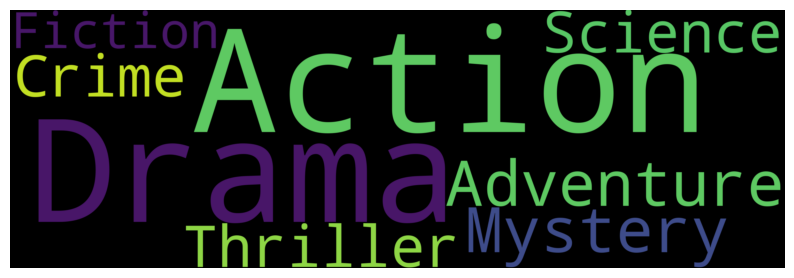

In [78]:
#Let's Visvalize it using word cloud
# import the module
from wordcloud import WordCloud, STOPWORDS


# Make the index of the top genres into a string for wordcloud
import matplotlib.pyplot as plt

text = ",".join(top_5_genres.index)
wordcloud = WordCloud(width = 3000, height = 1000, collocations= False, background_color = "black").generate(text)
plt.figure(figsize = (10,10))
#set figure size
plt.imshow(wordcloud, interpolation = "bilinear")
#Display image
plt.axis("off")
plt.show()

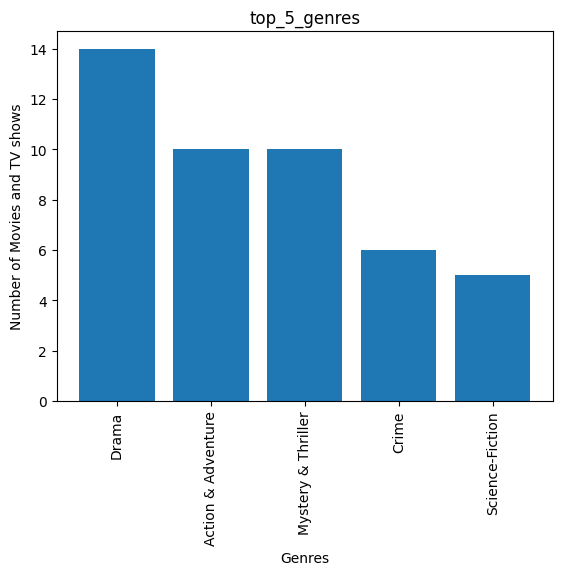

In [79]:
# Visualize it using barplot
plt.bar(top_5_genres.index, top_5_genres.values )
plt.xticks(rotation = 90)
plt.title("top_5_genres")
plt.xlabel("Genres")
plt.ylabel("Number of Movies and TV shows")
plt.show()

## **Finding Predominant Streaming Service**

In [95]:
# # Count occurrences of each streaming service
# service_counts = TV_Show_dict["Streaming Service"].value_counts()

# # Display the most frequent streaming service
# most_frequent_service = service_counts.idxmax()
# most_frequent_count = service_counts.max()

# print(f"The predominant streaming service is {most_frequent_service} with {most_frequent_count} entries.")
from collections import Counter
# Count occurrences of each service
service_counts = Counter(movie_services)

# Find the most common service
most_common_service, count = service_counts.most_common(1)[0]

print(f"The streaming service that is repeated the most is '{most_common_service}' with {count} occurrences.")


The streaming service that is repeated the most is 'Netflix' with 3 occurrences.


## **Task 3 :- Data Export**

In [104]:
# saving filter data as Filter Data in csv format
Final_df.to_csv("C:\\Users\\HP\\Desktop\\Almabetter\\Numerical_programming_assignment\\Filter_Data")

# **Dataset Drive Link (View Access with Anyone) -**

In [ ]:
# Dataset_Drive_Link = ''

# ***Congratulations!!! You have completed your Assignment.***